# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre:** Hiram Garcia Austria
#### **Matrícula:** A00378771

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [3]:
# Incluye aquí todas las librerías que consideres necesarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report



# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


Se entiende por rotación de personal a las entradas y salidas de empleados en una empresa. Esto se convierte en un problema cuando la rotación tiene una frecuencia muy alta, es decir, cuando la empresa contrata a un número muy elevado de personas, que después de poco tiempo, se van, o bien, son despedidas.

El hecho de que una empresa no pueda conservar a sus empleados por un tiempo suficiente genera otros problemas, como fuga de conocimiento, falta de trabajadores experimentados en sus puestos de trabajo y desorganización en las actividades de la empresa, ademas de crearse así una mala reputación en el mercado laboral.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [4]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

df = pd.read_csv("./WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ",")

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


Al incluir el argumento `include="all"` en la función `describe()`, se muestran todos los elementos del Data Frame, es decir, tanto los datos numéricos como los descriptivos.

Por otro lado, cuando la llamamos sin ningún argumento, se muestran únicamente los elementos numéricos del Data Frame, por eso es importante agregar este argumento cuando se quiere visualizar todos los campos del DataFrame.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Mismo valor en todos los registros. Por ser redundante puede complicar nuestro modelo, añadiendo características innecesarias que no ayudan a predecir la variable objetivo y puede causar over fitting. Es mejor borrarlo y ahorrar memoria.

**b)	EmployeeCount**: Mismo valor en todos los registros.

**c)	StandardHours**: Mismo valor en todos los registros.

**d)	EmployeeNumber**: Este dato es irrelevante para nuestro análisis, ya que cada empleado tiene un numero único.

++++++++ Termina la sección de agregar texto. +++++++++++




In [5]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [6]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

# Obtención de los datos de entrada y salida
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Partición de los datos de entrenamiento 70%, validación 15% y prueba 15%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

# Dimension obtenida de los 3 conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Tamaño del conjunto de entrenamiento: (1029, 30)
Tamaño del conjunto de validación: (220, 30)
Tamaño del conjunto de prueba: (221, 30)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [7]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

label_encoder = LabelEncoder()

# Aplicando la transformación LabelEncoder solo en el conjunto de entrenamiento para evitar filtrado de información
ytrainT = label_encoder.fit_transform(y_train)
yvalT = label_encoder.transform(y_val)
ytestT = label_encoder.transform(y_test)

# Proporción de clases en cada conjunto de datos
print('Porcentaje de datos en entrenamiento:', y_train.value_counts() / y_train.shape[0])
print('Porcentaje de datos en validación:', y_val.value_counts() / y_val.shape[0])
print('Porcentaje de datos en prueba:', y_test.value_counts() / y_test.shape[0])

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# print(ytrainT['Porcentaje de datos en cada clase de entrenamiento - Attrition:'].value_counts() / ytrainT.shape[0])

Porcentaje de datos en entrenamiento: Attrition
No     0.838678
Yes    0.161322
Name: count, dtype: float64
Porcentaje de datos en validación: Attrition
No     0.840909
Yes    0.159091
Name: count, dtype: float64
Porcentaje de datos en prueba: Attrition
No     0.837104
Yes    0.162896
Name: count, dtype: float64


Con esto podemos aseverar que los datos están desbalanceados, ya que la clase "No" representa al rededor del 84% de los registros. Mientras que la clase "Si" solo el 16%. 

# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

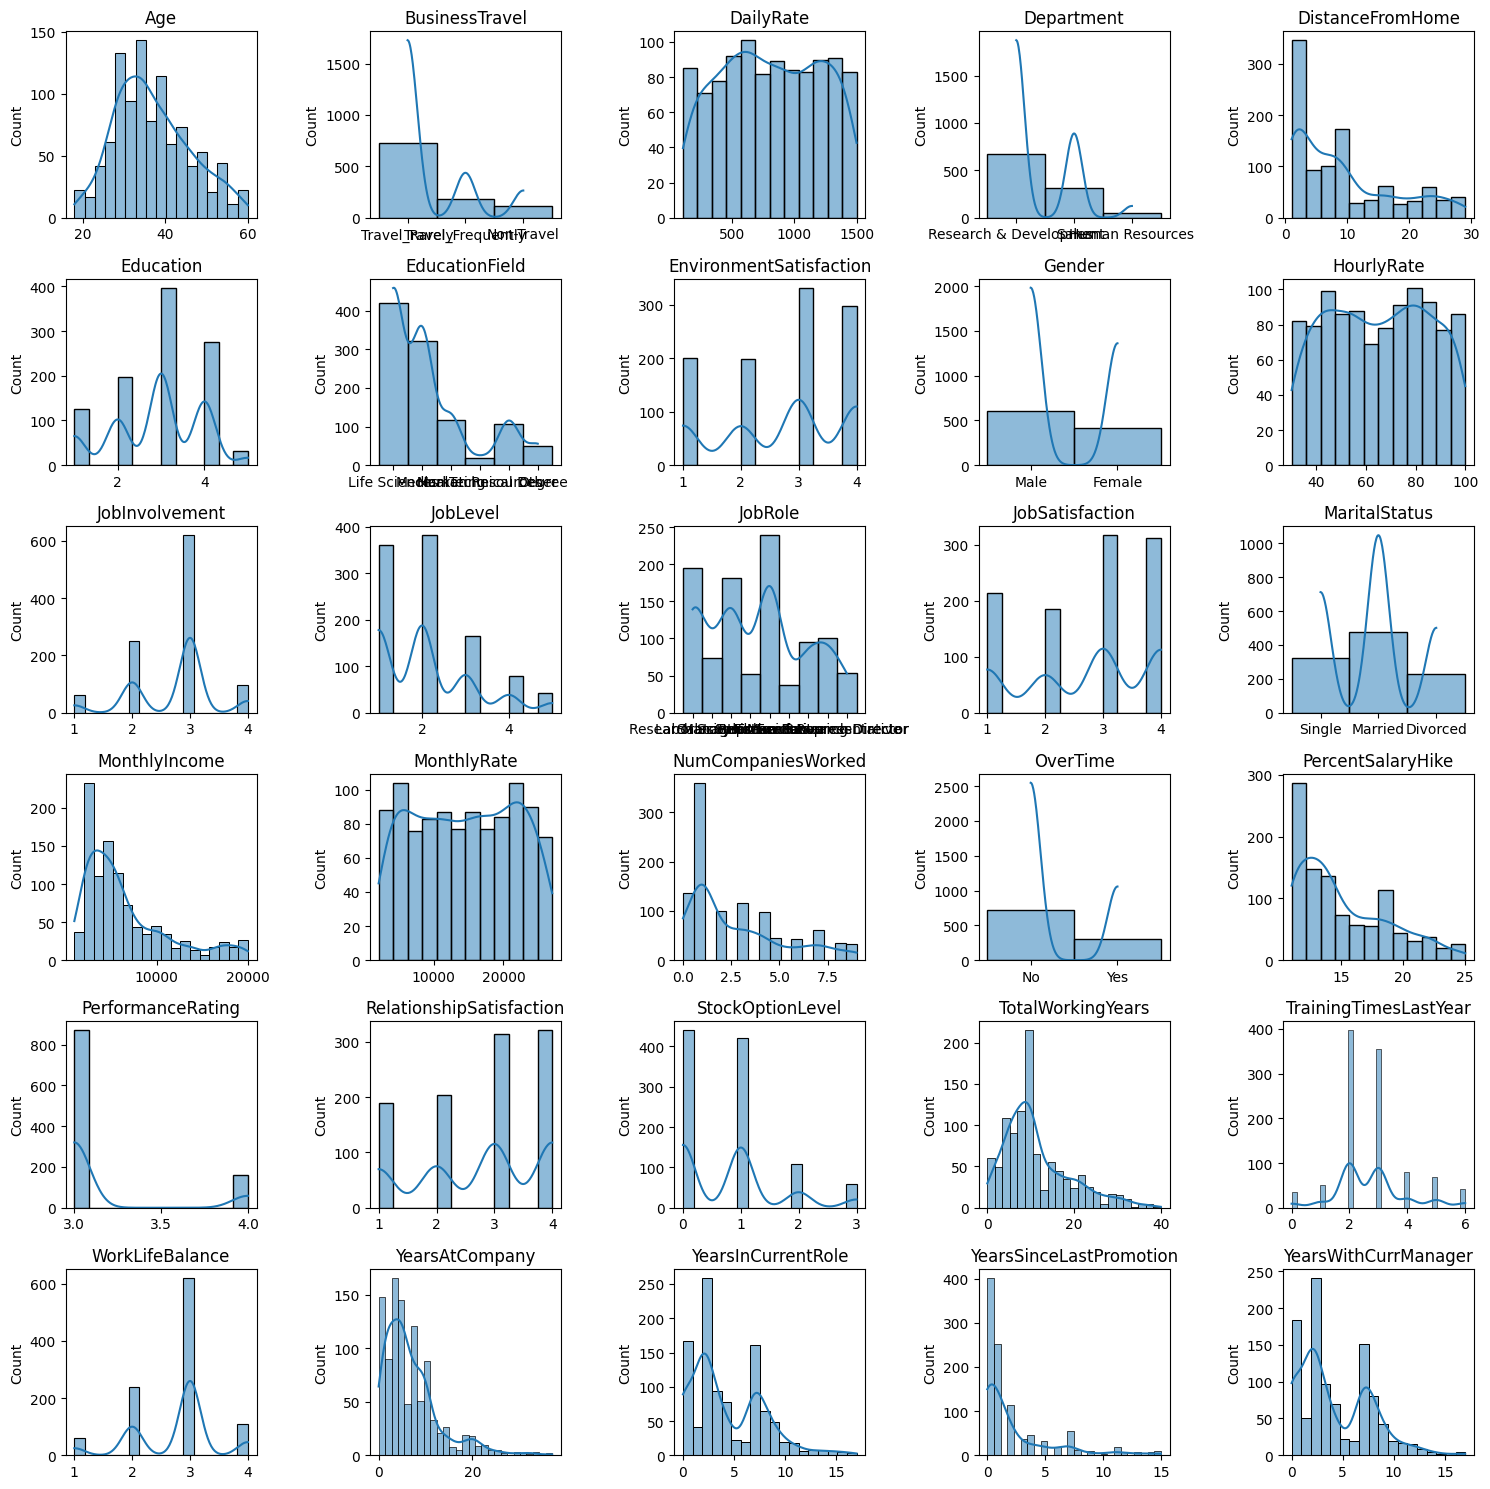

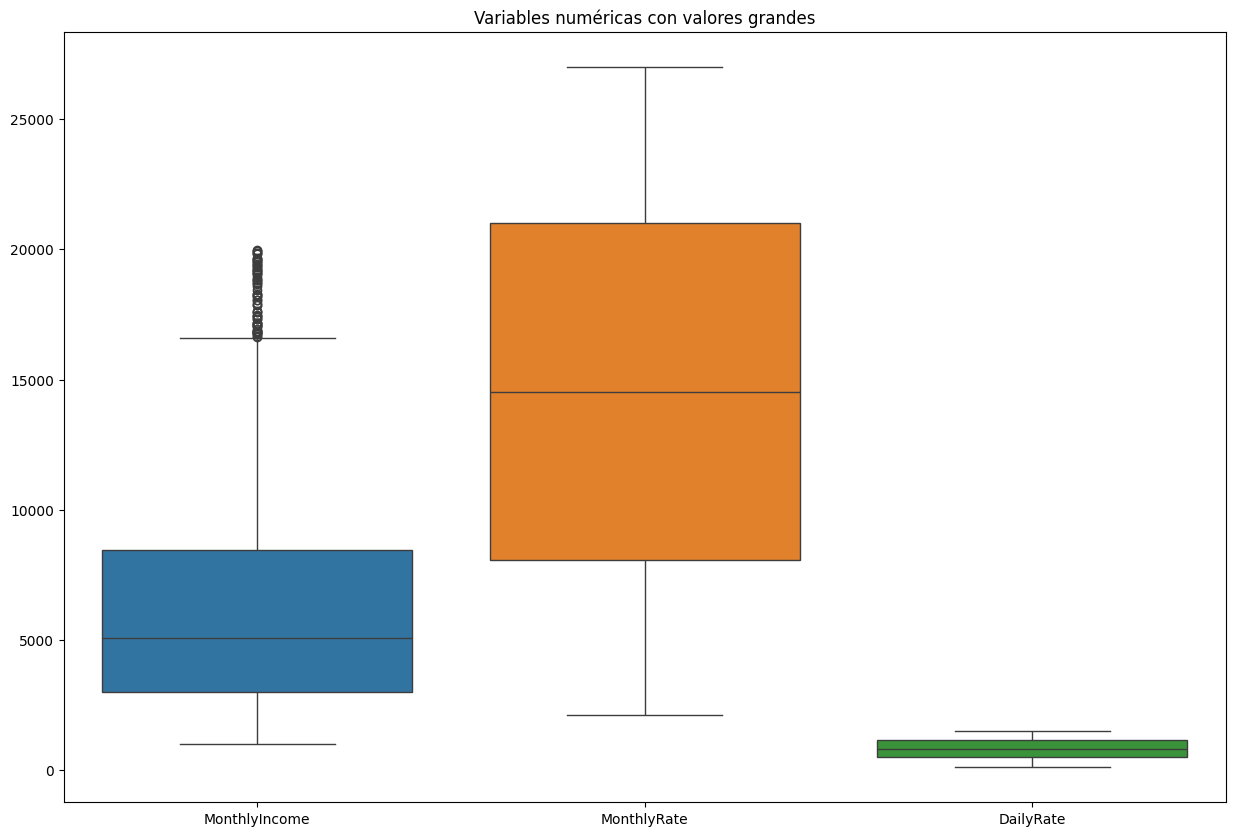

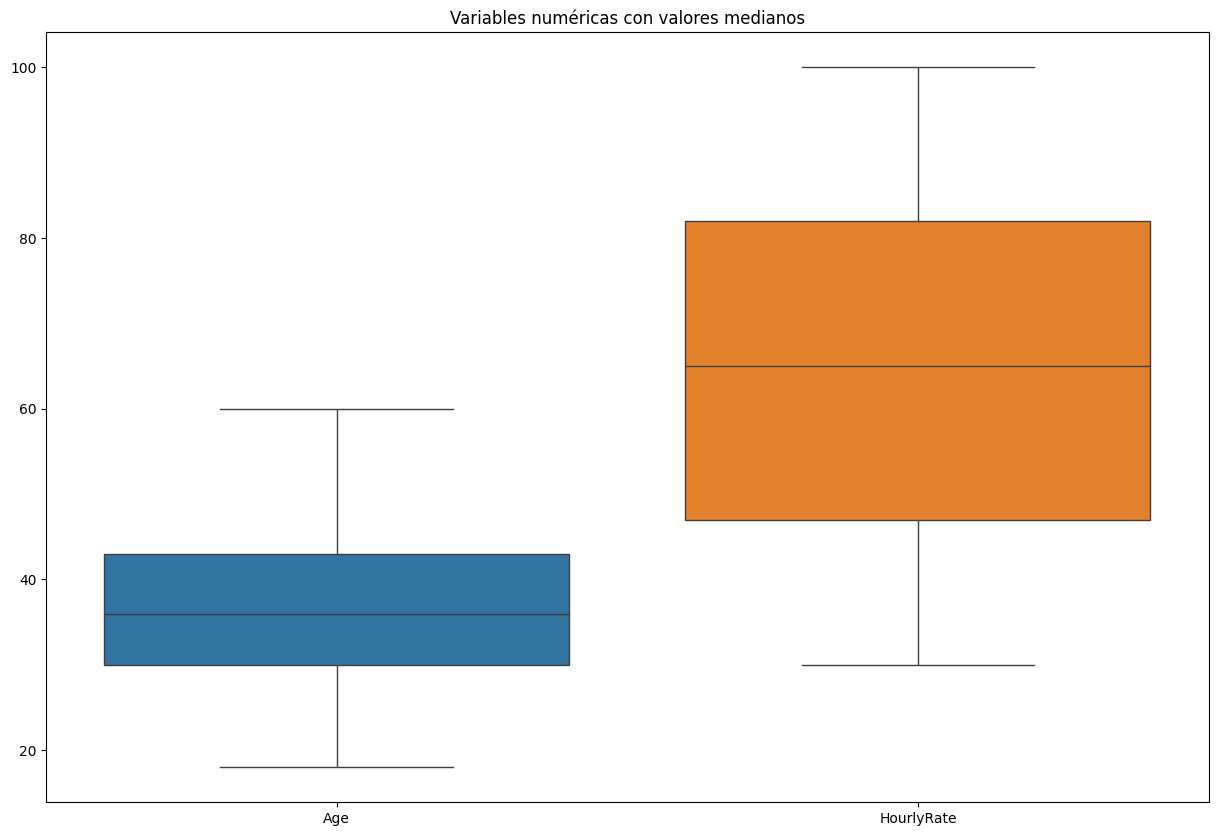

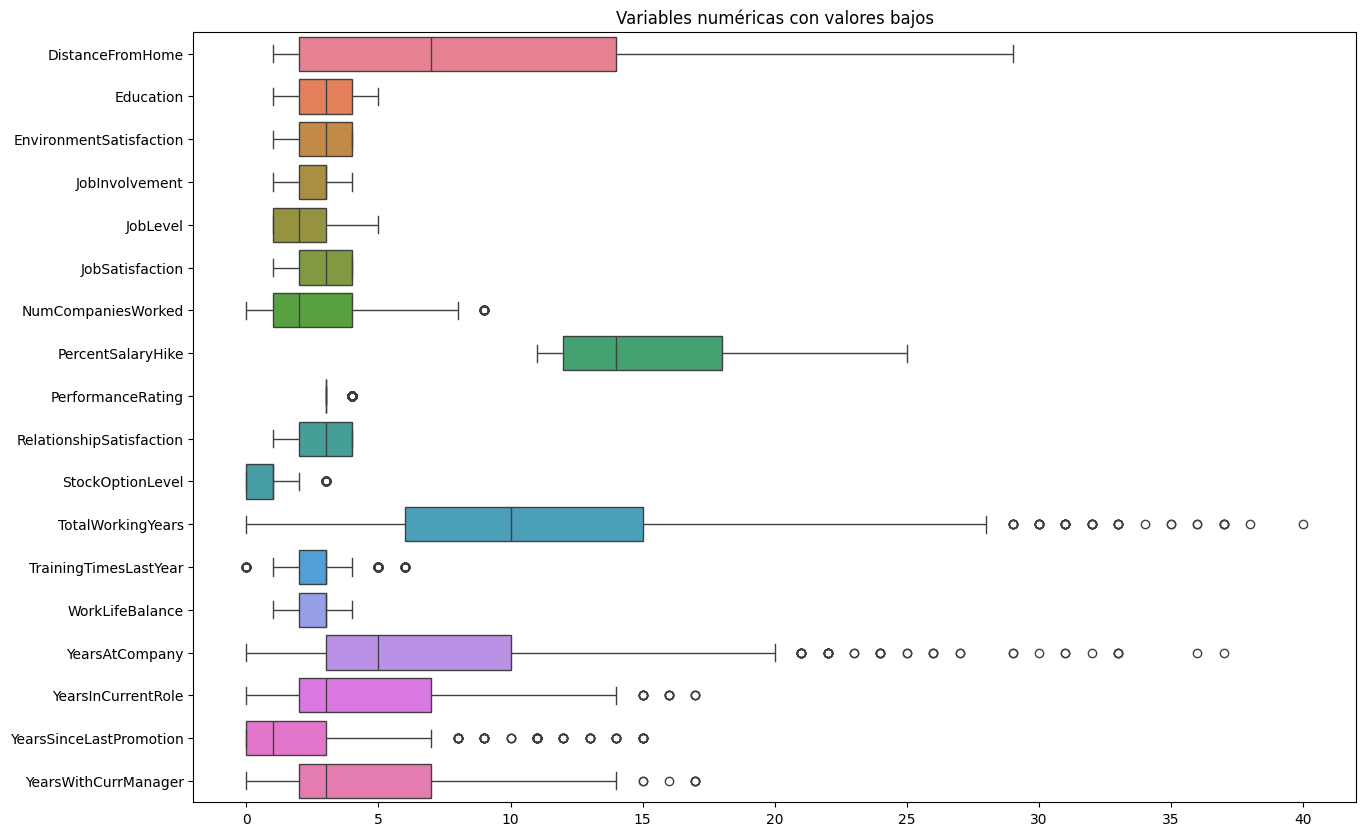

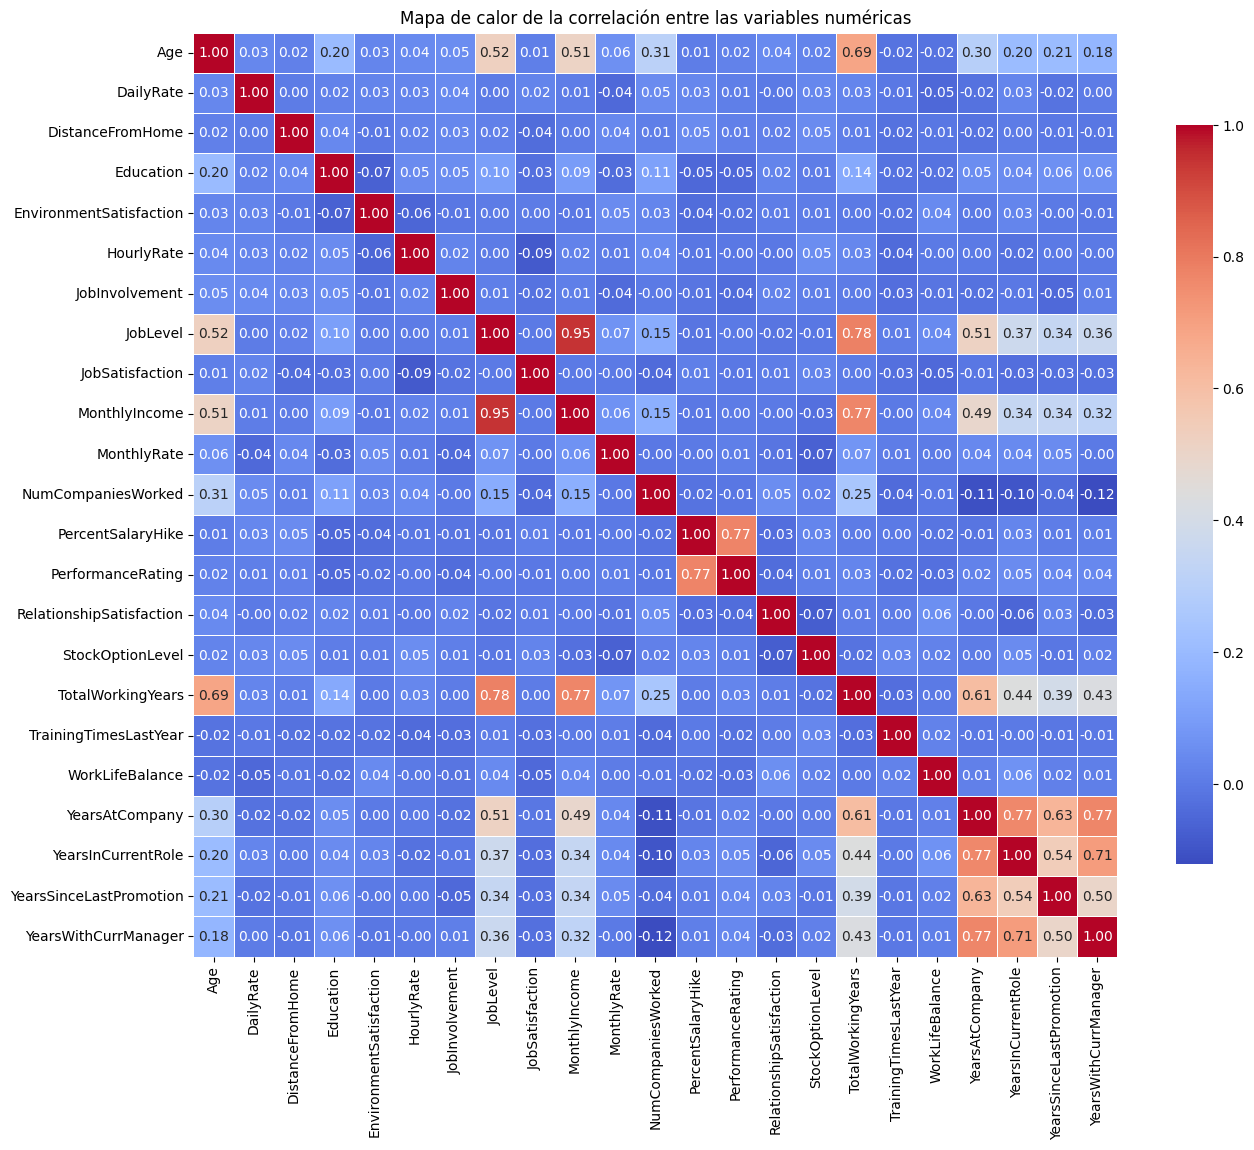

Estadísticas descriptivas de los datos de entrenamiento categóricos:


,count,unique,top,freq
BusinessTravel,1029,3,Travel_Rarely,732
Department,1029,3,Research & Development,668
EducationField,1029,6,Life Sciences,419
Gender,1029,2,Male,610
JobRole,1029,9,Sales Executive,239
MaritalStatus,1029,3,Married,477
OverTime,1029,2,No,727


In [8]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

# Gráfica de barras para todos los tipos de variable
fig, axes = plt.subplots(6, 5, figsize=(15, 15))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i < X_train.shape[1]:
        sns.histplot(data=X_train, x=X_train.columns[i], ax=ax, kde=True)
        ax.set_title(X_train.columns[i])
        ax.set_xlabel('')
plt.tight_layout()
plt.show()

# Box plot de variables numéricas con valores grandes
valores_grandes = ['MonthlyIncome', 'MonthlyRate', 'DailyRate']
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train[valores_grandes])
plt.title('Variables numéricas con valores grandes')
plt.show()

# Box plot de variables numéricas con valores medianos
valores_medianos = ['Age', 'HourlyRate']
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train[valores_medianos])
plt.title('Variables numéricas con valores medianos')
plt.show()

# Box plot de variables numéricas con valores bajos
X_train_normal = X_train.drop(valores_grandes + valores_medianos, axis=1)
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train_normal, orient='h')
plt.title('Variables numéricas con valores bajos')
plt.show()

# Separando las variables numéricas y categóricas
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_cat = X_train.select_dtypes(include=['object'])

# Quitando valores nulos de las variables numéricas
X_train_num = X_train_num.dropna()

# Mapa de calor de la correlación entre las variables numéricas
plt.figure(figsize=(15,12))
sns.heatmap(X_train_num.corr(), 
            annot=True,               # Mostrar los valores numéricos en cada celda
            fmt=".2f",                # Formato de los números (2 decimales)
            cmap="coolwarm",          # Esquema de colores
            linewidths=0.5,           # Líneas entre las celdas
            square=True,              # Mantener las celdas cuadradas
            cbar_kws={"shrink": 0.8}) # Ajustar el tamaño de la barra de color
plt.title('Mapa de calor de la correlación entre las variables numéricas')
plt.show()

# Estadísticas descriptivas de los datos de entrenamiento categóricos
print('Estadísticas descriptivas de los datos de entrenamiento categóricos:')
X_train_cat.describe().T

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



<!-- En base al desbalance visto en las gráficas y la tabla anterior, podemos considerar técnicas que ayuden a manejar el desequilibrio y asi mejorar el rendimiento de nuestro modelo.

Se podrían crear registros sintéticos, con la ayuda de la función "over_sampling" de la librería imblearn.
Pero me parece que la técnica mas adecuada puede ser el ajuste de los pesos de las clases, dándole así más importancia a la clase "Attrition" durante el entrenamiento.
Algunos modelos en scikit-learn como LogisticRegression, RandomForest, y SVM, permiten hacer esto con el parámetro class_weight. -->

### ANÁLISIS CON BOX PLOT:
Para poder visualizar todas las variables numéricas de una mejor forma, las separé en 3 grupos de acuerdo a la escala de sus valores: Grandes, medianos y bajos.

Con esto podemos ver que las variables `MonthlyIncome` y `MonthlyRate` necesitan ser escaladas, ya que tienen valores muy extremos, y algunos modelos de machine learning se ven afectados por esto.

Por otro lado, podemos notar que las siguientes variables tienen valores atípicos, algunas con muchos casos:
- `MonthlyIncome` (bastantes, pero tiene sentido, ya que la rotación se da en todos los niveles de la empresa, incluyendo puestos con altos salarios)
- `NumCompaniesWorked`
- `PerformanceRating`
- `StockOptionLevel`
- `TotalWorkingYears` (muchos)
- `TrainingTimesLastYear`
- `YearsAtCompany` (muchos)
- `YearsInCurrentRole`
- `YearsSinceLastPromotion` (muchos)
- `YearsWithCurrManager`

Es importante tratar estos valores atípicos adecuadamente para evitar que afecten negativamente el rendimiento de nuestro modelo.

No eliminaré datos, para evitar perder posible información valiosa. Pero a estos campos con valores atípicos les aplicare un escalado robusto para normalizar la columna.


### ANÁLISIS CON MAPA DE CALOR:

Con este gráfico notamos que las siguientes variables están correlacionadas positivamente entre si (no hay ninguna correlación negativa significativa):
- 0.95: `JobLevel` y `MonthlyIncome` (fuerte correlación)
- 0.78: `JobLevel` y `TotalWorkingYears` (correlación alta)
- 0.77: `MonthlyIncome` y `TotalWorkingYears` (correlación alta)
- 0.77: `YearsAtCompany` y `YearsAtCurrentRole` (correlación alta)
- 0.77: `YearsAtCompany` y `YearsWithCurrManager` (correlación alta)


### ANÁLISIS CON GRÁFICO DE BARRAS:
Con este análisis podemos ver que las siguientes variables tienen sesgo:
- `Age` (sesgo muy pronunciado a la derecha)
- `BusinessTravel` (sesgo a la derecha)
- `Department` (sesgo a la derecha)
- `DistanceFromHome` (sesgo muy pronunciado a la derecha)
- `Education` (sesgo a la izquierda)
- `EducationField` (sesgo muy pronunciado a la derecha)
- `EnvironmentSatisfaction` (sesgo a la izquierda)
- `JobLevel` (sesgo a la derecha)
- `MonthlyIncome` (sesgo muy pronunciado a la derecha)
- `NumCompaniesWorked` (sesgo muy pronunciado a la derecha)
- `PercentSalaryHike` (sesgo muy pronunciado a la derecha)
- `RelationshipSatisfaction` (sesgo a la izquierda)
- `TotalWorkingYears` (sesgo muy pronunciado a la derecha)
- `YearsAtCompany` (sesgo muy pronunciado a la derecha)
- `YearsInCurrentRole` (sesgo muy pronunciado a la derecha)
- `YearsSinceLastPromotion` (sesgo muy pronunciado a la derecha)
- `YearsWithCurrManager` (sesgo muy pronunciado a la derecha)

Por lo tanto, las variables con poco sesgo las dejaremos como están, aunque normalmente es bueno aplicarles la raíz cuadrada.

Sin embargo, para aquellas que tienen un sesgo muy prolongado a la derecha, les aplicare la función logarítmica, para que no afecte el rendimiento de nuestro modelo.

### ANÁLISIS CON ESTADÍSTICAS DESCRIPTIVAS:
Convertiré todas las variables categóricas nominales y booleanas a hot-encoding para asignar un valor numérico a cada categoría y evitar problemas con algunos modelos que no se llevan bien con variables categóricas.
- `Gender` (boolean)
- `OverTime` (boolean)
- `BusinessTravel`
- `Department`
- `EducationField`
- `JobRole`
- `MaritalStatus`

Mientras que a las variables categóricas ordinales les asignare una transformación "OrdinalEncoder" que asigna un valor numérico a cada categoría de acuerdo a su orden.
- `Education`
- `EnvironmentSatisfaction`
- `JobInvolvement`
- `JobLevel`
- `JobSatisfaction`
- `PerformanceRating`
- `RelationshipSatisfaction`
- `StockOptionLevel`
- `WorkLifeBalance`



# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [9]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
# Imputar la mediana en valores faltantes de todas las variables numéricas
nums_pipeline = Pipeline(steps = [
    ('imputMediana', SimpleImputer(strategy='median')),
])
nums_pipeline_nombres = [
    'NumCompaniesWorked',
    'TrainingTimesLastYear',
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Transformación logarítmica en variables numéricas con sesgo muy amplio a la derecha
log_transformer = FunctionTransformer(np.log)
log_transformer_nombres = [
    'Age',
    'DistanceFromHome',
    'MonthlyIncome',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
]

# Transformación con MinMaxScaler para variables numéricas con valores extremos
num_extremos_pipeline = Pipeline(steps = [
    ('scalaMinMax', MinMaxScaler(feature_range=(-1, 1)))
])
num_extremos_pipeline_nombres = [
    'MonthlyIncome',
    'MonthlyRate',
]

# Transformación con RobustScaler para variables numéricas con valores atípicos
num_atipicos_pipeline = Pipeline(steps = [
    ('scalaRobusta', RobustScaler())
])
num_atipicos_pipeline_nombres = [
    'MonthlyIncome',
    'NumCompaniesWorked',
    'PerformanceRating',
    'StockOptionLevel',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# ORDINALES:
catOrd_pipeline = Pipeline(steps = [
    ('imputModa', SimpleImputer(strategy='most_frequent')),
    ('ordinalEncoder', OrdinalEncoder())
])
catOrd_pipeline_nombres = [
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

# BINARIAS:
catBin_pipeline = Pipeline(steps = [
    ('imputModa', SimpleImputer(strategy='most_frequent')),
    ('labelEncoder', OneHotEncoder())
])
catBin_pipeline_nombres = ['Gender', 'OverTime']

# NOMINALES:
catNom_pipeline = Pipeline(steps = [
    ('imputModa', SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
catNom_pipeline_nombres = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Aplicamos las transformaciones
columnasTransformer = ColumnTransformer(transformers = [
    ('nums', nums_pipeline, nums_pipeline_nombres),
    ('num_extremos', num_extremos_pipeline, num_extremos_pipeline_nombres),
    ('num_atipicos', num_atipicos_pipeline, num_atipicos_pipeline_nombres),
    ('catOrd', catOrd_pipeline, catOrd_pipeline_nombres),
    ('catBin', catBin_pipeline, catBin_pipeline_nombres),
    ('catNom', catNom_pipeline, catNom_pipeline_nombres)
], remainder='passthrough')

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [10]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# Reagrupando los datos de entrenamiento y validación en un solo DataFrame
Xtv = pd.concat([X_train, X_val])
ytv = pd.concat([y_train, y_val])

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1249, 30)
(1249,)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

>> LR 0.872 (0.019)
>> LASSO 0.876 (0.016)
>> RIDGE 0.873 (0.018)


c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

>> EN 0.839 (0.002)
>> kNN 0.820 (0.016)


C:\Users\hille\AppData\Local\Temp\ipykernel_20428\3636637701.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.


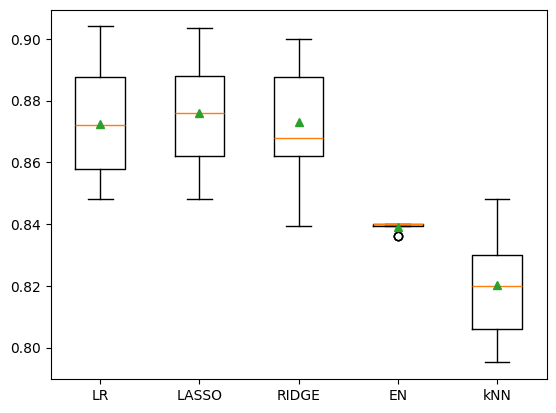

In [11]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs', max_iter=2000, # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')

  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear', max_iter=2000, C=1., # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')

  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='liblinear', max_iter=2000, C=10.01, # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')

  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    l1_ratio=0.5, solver='saga', max_iter=4000, C=1., # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')

  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier()) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [12]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

# LR y Lasso son los mejores modelos, pero Lasso tiene sus 3 últimos cuartiles más altos, asi que escogemos Lasso
mejor_modelo = LogisticRegression(penalty='l1', solver='liblinear', random_state=1)

dicc_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000, 3000, 4000]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

grid = GridSearchCV(estimator=mejor_modelo, param_grid=dicc_grid, scoring='accuracy', cv=cv, n_jobs=-1, return_train_score=True)

Xx = columnasTransformer.fit_transform(Xtv)

grid_result = grid.fit(Xx, np.ravel(ytv))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.879905 usando {'C': 1, 'max_iter': 1000, 'solver': 'liblinear'}
Promedios Train mean(std): 0.8563(0.0018)
Promedios Val mean(std): 0.8518(0.0064)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

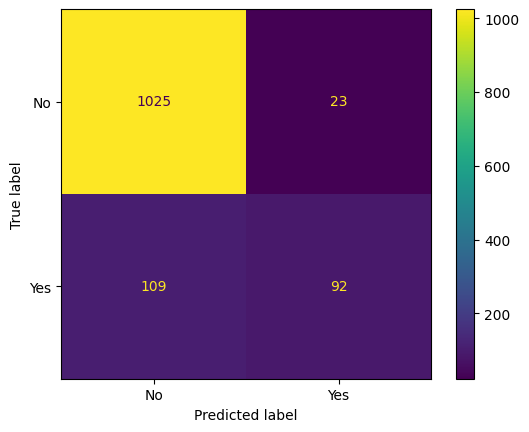

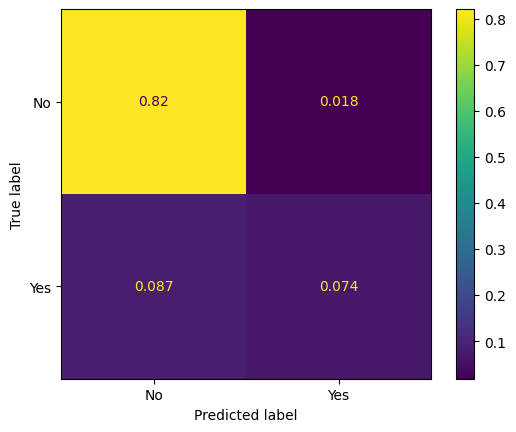

In [13]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.


modelo_ganador = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=1,
    max_iter=1000,
    random_state=1
)

Xx = columnasTransformer.fit_transform(Xtv)
mejor_resultado = modelo_ganador.fit(Xx, np.ravel(ytv))
mejor_resultado.score(columnasTransformer.transform(X_test), np.ravel(y_test))

# Matriz de confusion
ConfusionMatrixDisplay.from_estimator(mejor_resultado, Xx, np.ravel(ytv))
plt.show()

# Matriz de confusion con porcentajes
ConfusionMatrixDisplay.from_estimator(mejor_resultado, Xx, np.ravel(ytv), normalize='all')
plt.show()


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

### ANALISIS DE LA MATRIZ DE CONFUSIÓN

La matriz de confusión es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación. En este caso, la matriz de confusión generada para el modelo ganador nos dice que:

- **Verdaderos Negativos (0.82)**: Número de instancias correctamente clasificadas como negativas (No Attrition). Indica que 1025 empleados que realmente no dejaron la empresa fueron correctamente identificados por el modelo.

- **Falsos Positivos (0.018)**: Número de instancias incorrectamente clasificadas como positivas (predijo Attrition, pero en realidad No Attrition). Indica que 23 empleados que no dejaron la empresa fueron incorrectamente clasificados como que sí dejaron la empresa.

- **Falsos Negativos (0.087)**: Número de instancias incorrectamente clasificadas como negativas (predijo No Attrition, pero en realidad Attrition). Indica que 109 empleados que dejaron la empresa fueron incorrectamente clasificados como que no dejaron la empresa.

- **Verdaderos Positivos (0.074)**: Número de instancias correctamente clasificadas como positivas (Attrition). Indica que 92 empleados que realmente dejaron la empresa fueron correctamente identificados por el modelo.

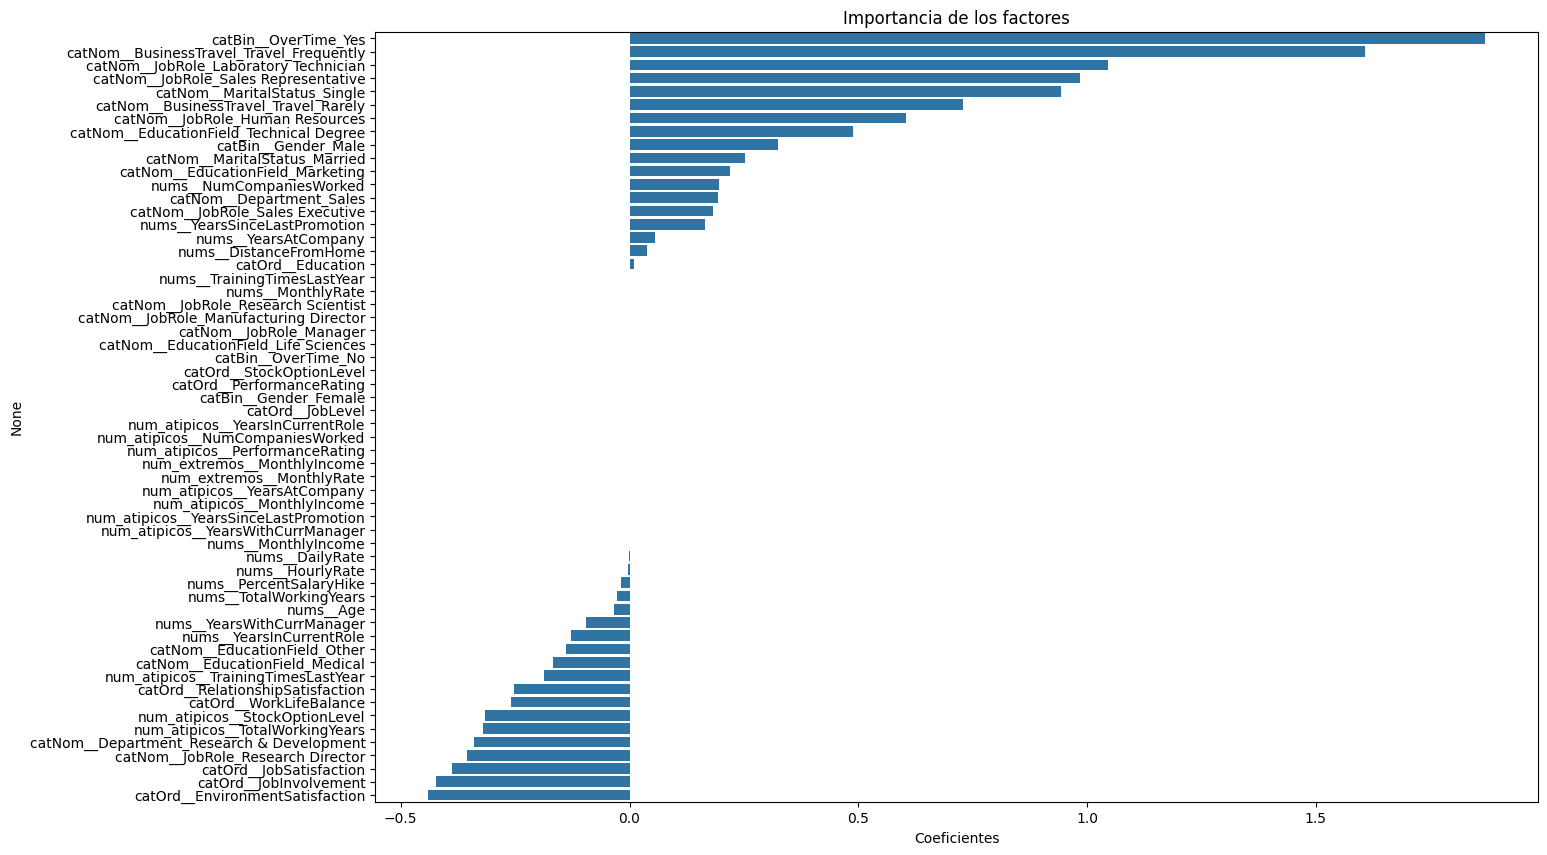

In [14]:
# Importancia de factores
factores = pd.DataFrame(data = modelo_ganador.coef_.reshape(-1, 1),
            index = columnasTransformer.get_feature_names_out(),
            columns = ['Coeficientes']).sort_values(by='Coeficientes', ascending=False)

# Visualizando los datos
plt.figure(figsize=(15, 10))
sns.barplot(x=factores['Coeficientes'], y=factores.index)
plt.title('Importancia de los factores')
plt.show()

### ANÁLISIS DE IMPORTANCIA DE FACTORES

La tabla de coeficientes nos muestra que las variables que tienen un mayor impacto positivo en la probabilidad de que un empleado renuncie son:

`OverTime_Yes`, `BusinessTravel_Travel_Frequently`, `JobRole_Laboratory Technician`, `JobRole_Sales Representative`, `MaritalStatus_Single`


Mientras que las variables que tienen un mayor impacto negativo en la probabilidad de que un empleado renuncie son:

`EnvironmentSatisfaction`, `JobInvolvement`, `JobSatisfaction`, `Research Director`


In [15]:
#  reporte con métricas del modelo obtenido
print(classification_report(y_test, mejor_resultado.predict(columnasTransformer.transform(X_test))))

              precision    recall  f1-score   support

          No       0.90      0.97      0.93       185
         Yes       0.73      0.44      0.55        36

    accuracy                           0.88       221
   macro avg       0.81      0.71      0.74       221
weighted avg       0.87      0.88      0.87       221



# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [16]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

X_test_transformado = columnasTransformer.transform(X_test)
accuracy = mejor_resultado.score(X_test_transformado, np.ravel(y_test))
print('Exactitud del modelo en el conjunto de prueba:', accuracy)

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

Exactitud del modelo en el conjunto de prueba: 0.8823529411764706


# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++


## **CONCLUSIONES**

Esta ha sido una actividad realmente retadora y a la vez enriquecedora, ya que he logrado aprender y sobretodo aplicar una gran cantidad de técnicas y herramientas de preprocesamiento de datos, selección de modelos y ajuste de hiperparámetros que hasta antes de este ejercicio yo desconocía.

Se ha logrado obtener un modelo de clasificación con una exactitud del 0.88 en el conjunto de prueba, lo cual es un resultado bastante aceptable.

También logré identificar que las variables (razones) más importantes para predecir la rotación de empleados de acuerdo a los datos obtenidos son:
- Que una persona trabaje horas extra (OverTime),
- Que viaje frecuentemente por trabajo (BusinessTravel_Travel_Frequently),
- Que no este casado/a o divorciado (MaritalStatus_Single),
- Que su puesto de trabajo sea técnico de laboratorio (JobRole_Laboratory Technician) o representante de ventas (JobRole_Sales Representative).

Con esto confirmamos los estigmas que se tienen sobre los investigadores y los vendedores, en donde los primeros tienden a trabajar hasta altas horas de la noche y muchas horas al dia, mientras que los segundos tienden a viajar muy frecuentemente por negocios. 

Por otro lado, las variables (razones) que menos influyen en la rotación de empleados son:
- la satisfacción con el ambiente laboral (EnvironmentSatisfaction),
- la satisfacción con el trabajo (JobSatisfaction),
- la involucración en el trabajo (JobInvolvement),
- el puesto de trabajo como Director de investigación (JobRole_Research Director),

En general, el modelo de regresión logística con regularización L1 (Lasso) ha sido el mejor modelo para predecir la rotación de empleados en la empresa, ya que ha obtenido la mejor exactitud en el conjunto de prueba y ha sido el modelo con el mejor desempeño en la validación cruzada.

Finalmente, pude verificar que el modelo no esta sobre entrenado, ya que la diferencia entre el conjunto de entrenamiento y el de validación no fue mayor al 3%.

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<